In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, issparse
from scipy.sparse.linalg import norm as spnorm
import pickle
import sklearn
from scipy import sparse
from ntf_cython.random import rel_error
from nmf_compressed.compression import algo41, algo43, algo45, algo46, structured_compression, count_gauss
from nmf_compressed.sparse_compression import algo41_sparse
from sklearn.decomposition.nmf import _initialize_nmf
from nmf_compressed.structured_nmf import structured_randomized_bppnmf
from numpy.linalg import norm, solve
from ntf_cython.nmf import nmf


%matplotlib inline

## Using Randomly Generated Synthetic Data

In [2]:
m = 10000
n = 1000
np.random.seed(0)
A = np.abs(np.random.randn(m, n))
r = 400

# Dense Random Matrices 

# COMPRESSED NMF WITH ALGO 42

In [3]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='algo42', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

The matrix is dense. We use compressed block principal pivoting method
CPU times: user 16min 40s, sys: 1min 31s, total: 18min 12s
Wall time: 10min 45s


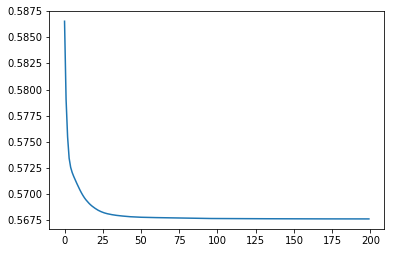

In [4]:
plt.plot(relative_error)

In [5]:
rel_error(A, U.dot(V))

0.56761257692166922

# COMPRESSED NMF WITH ALGO 41

In [6]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='algo41', q=20, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

The matrix is dense. We use compressed block principal pivoting method


/Users/user/anaconda3/envs/7mw/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class ConvergenceWarning is deprecated; ConvergenceWarning has been moved into the sklearn.exceptions module. It will not be available here from version 0.19
  warnings.warn(msg, category=DeprecationWarning)
/Users/user/anaconda3/envs/7mw/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1915 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/envs/7mw/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class ConvergenceWarning is deprecated; ConvergenceWarning has been moved into the sklearn.exceptions module. It will not be available here from version 0.19
  warnings.warn(msg, category=DeprecationWarning)
/Users/user/anaconda3/envs/7mw/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1920 reached. Increase it to

CPU times: user 1h 37min 58s, sys: 3min 8s, total: 1h 41min 6s
Wall time: 1h 1min 50s


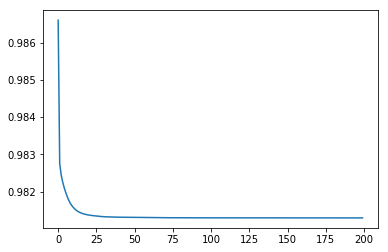

In [7]:
plt.plot(relative_error)

# COMPRESSED BPP WITH QR

In [8]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

The matrix is dense. We use compressed block principal pivoting method
CPU times: user 16min 28s, sys: 1min 32s, total: 18min 1s
Wall time: 10min 50s


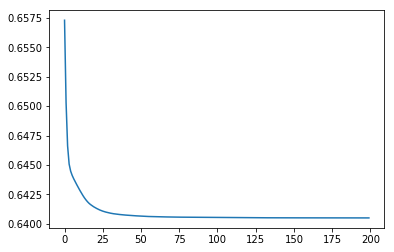

In [9]:
plt.plot(relative_error)

# COMPRESSED BPP WITH ALGO43

In [10]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='algo43', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

The matrix is dense. We use compressed block principal pivoting method


/Users/user/anaconda3/envs/7mw/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class ConvergenceWarning is deprecated; ConvergenceWarning has been moved into the sklearn.exceptions module. It will not be available here from version 0.19
  warnings.warn(msg, category=DeprecationWarning)
/Users/user/anaconda3/envs/7mw/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1925 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/envs/7mw/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class ConvergenceWarning is deprecated; ConvergenceWarning has been moved into the sklearn.exceptions module. It will not be available here from version 0.19
  warnings.warn(msg, category=DeprecationWarning)
/Users/user/anaconda3/envs/7mw/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1930 reached. Increase it to

CPU times: user 1h 30min 43s, sys: 3min 3s, total: 1h 33min 47s
Wall time: 59min 56s


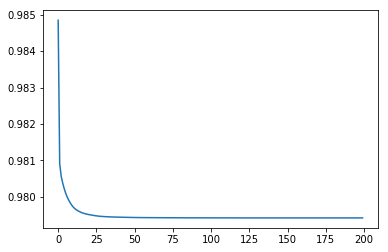

In [ ]:
plt.plot(relative_error)

## COMPRESSED BPP WITH ALGO44

In [ ]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='algo44', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

The matrix is dense. We use compressed block principal pivoting method


In [ ]:
plt.plot(relative_error)

## COMPRESSED BPP WITH STRUCTURED COMPRESSION

In [ ]:
%%200
U, V, relative_error = structured_randomized_bppnmf(A, algo='structured_compression', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

In [ ]:
plt.plot(relative_error)

## COMPRESSED BPP WITH COUNT GAUSSIAN

In [ ]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='count_gauss', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

In [ ]:
plt.plot(relative_error)

# UNCOMPRESSED BPP IMPLEMENTATION

In [ ]:
%time W, H, _, _ = nmf(A, n_components=r, max_iter=200, random_state=2)

In [ ]:
A.shape

In [ ]:
rel_error(A, W.dot(H))